# Part One: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'logins.json'
df = pd.read_json(path)
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
df['Ridership'] = np.ones(len(df.login_time))
df

,login_time,Ridership
0,1970-01-01 20:13:18,1.0
1,1970-01-01 20:16:10,1.0
2,1970-01-01 20:16:37,1.0
3,1970-01-01 20:16:36,1.0
4,1970-01-01 20:26:21,1.0
...,...,...
93137,1970-04-13 18:50:19,1.0
93138,1970-04-13 18:43:56,1.0
93139,1970-04-13 18:54:02,1.0
93140,1970-04-13 18:57:38,1.0


In [7]:
df.set_index('login_time', inplace=True)
df

,Ridership
login_time,
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0
...,...
1970-04-13 18:50:19,1.0
1970-04-13 18:43:56,1.0
1970-04-13 18:54:02,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ridership  93142 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


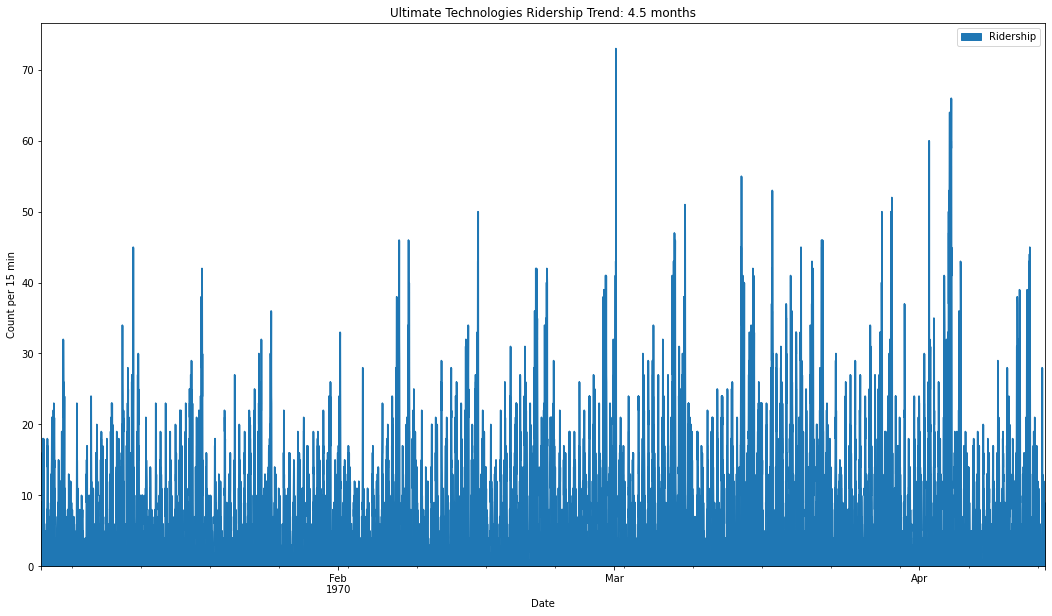

In [9]:
fig, ax = plt.subplots(figsize=(18, 10))
df.groupby(pd.Grouper(freq='15min')).sum().plot.area(ax=ax)
ax.set_ylabel("Count per 15 min")
ax.set_xlabel("Date")
ax.set_title('Ultimate Technologies Ridership Trend: 4.5 months')
plt.show()

Looking at the whole timeseries, two trends stand out. First, it appears ridership is increasing from January to April; depending on the location of the data, this could be due to nicer weather incentivizing people to travel around their locale. Second, the minor ticks indicate the starts of weeks, so it can be seen that ridership appears to start low at the beginning of the week, but increase towards the weekend.

In [10]:
winter_ridership = len(df.groupby(pd.Grouper(freq='15min')).sum()['1970-01-01' : '1970-02-28']) #59 days
winter_ridership

5584

In [11]:
spring_ridership = len(df.groupby(pd.Grouper(freq='15min')).sum()['1970-03-01' : '1970-04-28']) #59 days
spring_ridership

4204

Well, the first assumption was wrong, actually it appears more people use the ride service when there is winter weather, so presumably they could be walking as the weather gets nicer. Second, checking a calendar of February 1970 confirms that February 2nd is a Monday, so this random week can be investigated for trends.

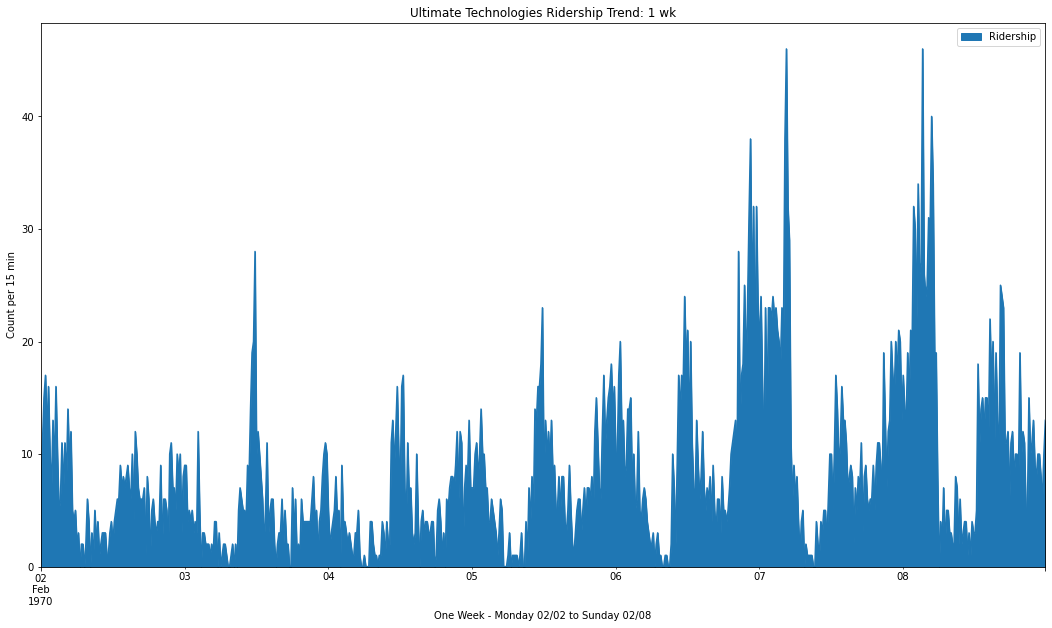

In [12]:
fig, ax = plt.subplots(figsize=(18, 10))
df.groupby(pd.Grouper(freq='15min')).sum()['1970-02-02' : '1970-02-08'].plot.area(ax=ax)
ax.set_ylabel("Count per 15 min")
ax.set_xlabel("One Week - Monday 02/02 to Sunday 02/08")
ax.set_title('Ultimate Technologies Ridership Trend: 1 wk')
plt.show()

Indeed, ridership appears to be strongest on Friday and Saturday nights.

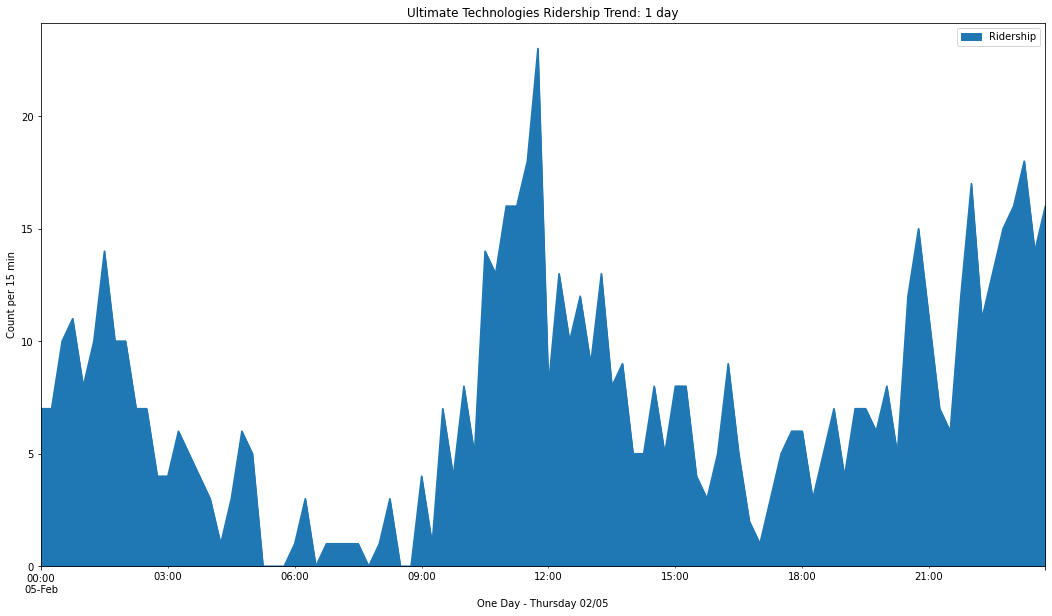

In [13]:
fig, ax = plt.subplots(figsize=(18, 10))
df.groupby(pd.Grouper(freq='15min')).sum()['1970-02-05' : '1970-02-05'].plot.area(ax=ax)
ax.set_ylabel("Count per 15 min")
ax.set_xlabel("One Day - Thursday 02/05")
ax.set_title('Ultimate Technologies Ridership Trend: 1 day')
plt.show()

It appears ridership is really strong throughout the work day, and then again during afterhours, perhaps when bars close.

# Part Two: Experiment and Metrics Design

## Problem statement:
* on weekdays only, Area 1 is busier at night while Area 2 is busier during the day
* on weekends, the two areas are similar
* a two way toll separates the areas, meaning there is little crossover of cab drivers between the two areas when the drivers pay the toll
* now the cab company pays the toll - is this successful?

## Specific questions:
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of the observation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
## Answers
1) I would use # of rides as the metric, specifically looking the mean number of rides before the change versus after the change. This is important because each ride earns money, and there needs to be enough new earnings from increased rides to offset the amount now spent on the tolls
2) I would look at the prior years of data if possible to understand the ridership trends for each month of the year - previous analysis has suggested ridership may change depending on season. Then, I would run a trial period where tolls are paid for by Ultimate Technologies. For the period that the trial was run, I would look back at previous yearly data for that interval of time and get an average and standard deviation for the expected ridership. Lastly, I would calculate the ridership for the trial period, and identify if it was significantly different from the previous years by using a hypthesis test - specifically, I would look for the probability that the new average would occur given that the change made no difference and if it's less than +5% then I would look at the revenue gained by that new amount of ridership and calculate if it offsets the cost of the tolls.

In [14]:
path2 = 'ultimate_data_challenge.json'
df2 = pd.read_json(path2)
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [17]:
df2.last_trip_date = pd.to_datetime(df2.last_trip_date)
df2.signup_date = pd.to_datetime(df2.signup_date)

In [18]:
df2.describe(datetime_is_numeric=True)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [19]:
df2['retained'] = [1 if i else 0 for i in df2.last_trip_date > '2014-05-31']

In [20]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


Only 37.61% of riders retained.

Next, impute some data. There are missing values in driver rating, rider rating, and phone columns. Using knowledge of ridesharing, assume missing driver rating is due to poor engagement/experience of customer and set to minimum of 1. It is less why a rider would not recieve a rating, and there are few instances, so these columns will be dropped. The phone column needs to be investigated.

In [21]:
df2.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

It's hard to image how the rideshare app wouldn't be reporting the app OS, so if 'None' reported, assume ride was a call in, therefore 'no_smartphone'.

In [22]:
df2.phone = df2.phone.fillna(value='no_smartphone')

In [23]:
df2.avg_rating_of_driver = df2.avg_rating_of_driver.fillna(value=1)

In [24]:
df2.dropna(inplace=True)
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,1.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [25]:
# ultimate black user column to 1/0
df2.ultimate_black_user = [1 if i else 0 for i in df2.ultimate_black_user]
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,1.0,1.00,2014-01-25,iPhone,0.0,0,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,0,100.0,4.58,3.5,0


In [26]:
# remove date info as too high entropy, one hot encode city and phone
df2.drop(columns=['signup_date', 'last_trip_date'], inplace=True)
df2 = pd.get_dummies(data=df2, columns=['city', 'phone'], drop_first=True)

<AxesSubplot:>

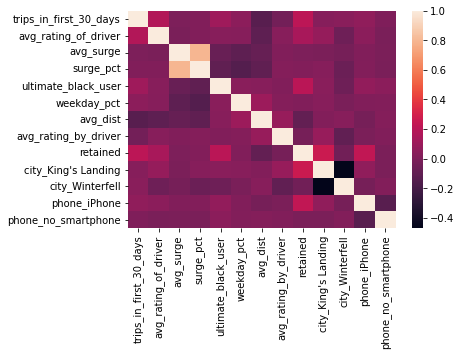

In [27]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

There's not a lot of inter-feature correlation in the data, so no more columns will be dropped, though an argument could be made for dropping one of surge_pct or avg_surge. Some factors that influence retention can also be identified, like maybe trips in first 30 days, driver rating ultimate black user, king's landing, or iphone users.

In [28]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns='retained')
y = df2.retained
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)

In [30]:
X_test[X_test.columns] = SS.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
models = list()
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('RNC', RadiusNeighborsClassifier(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LSVC', LinearSVC()))
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('RC', RidgeClassifier()))
models.append(('MLPC', MLPClassifier()))
models.append(('RFC', RandomForestClassifier(n_jobs=-1)))
models.append(('GBC', GradientBoostingClassifier()))

In [33]:
from sklearn.model_selection import cross_validate
scores = list() 

In [34]:
for model in models:
    cv_results = cross_validate(model[1], X_train, y_train, cv=10, n_jobs=-1)
    scores.append((model[0], cv_results['test_score']))

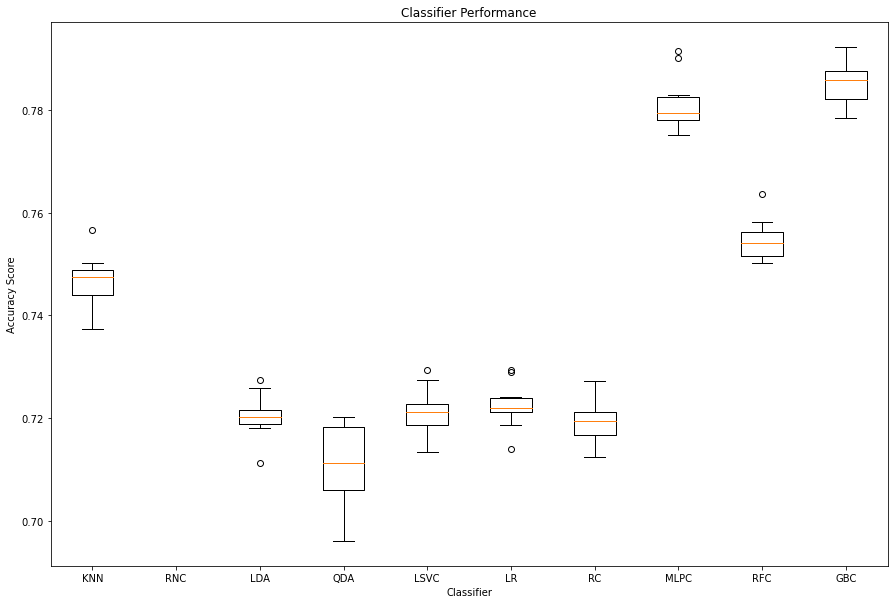

In [35]:
scores = list(zip(*scores))
fig = plt.figure(figsize =(15, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(scores[1], labels=scores[0])
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Classifier Performance')

plt.savefig('boxplot.png')
plt.show()

Gradient boost classifier performs best, so will be run through a hyper parameter search.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'learning_rate': [0.01, 0.1],
              'n_estimators': [100, 400],
              'criterion': ['friedman_mse', 'squared_error'],
              'max_depth': np.arange(3, 12, 3),
              'max_features': ['sqrt', None]}

In [38]:
GBC = GradientBoostingClassifier()
clf = GridSearchCV(GBC, param_grid=param_grid, n_jobs=-1, cv=5)

In [39]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': array([3, 6, 9]),
                         'max_features': ['sqrt', None],
                         'n_estimators': [100, 400]})

In [40]:
clf.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [41]:
clf.best_score_

0.7895526623833666

In [42]:
model = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.1, max_depth=3, \
                                      max_features='sqrt', n_estimators=400).fit(X_train, y_train)

In [43]:
print(model.score(X_test, y_test))

0.7905220883534136


In [44]:
y_pred = model.predict(X_test)

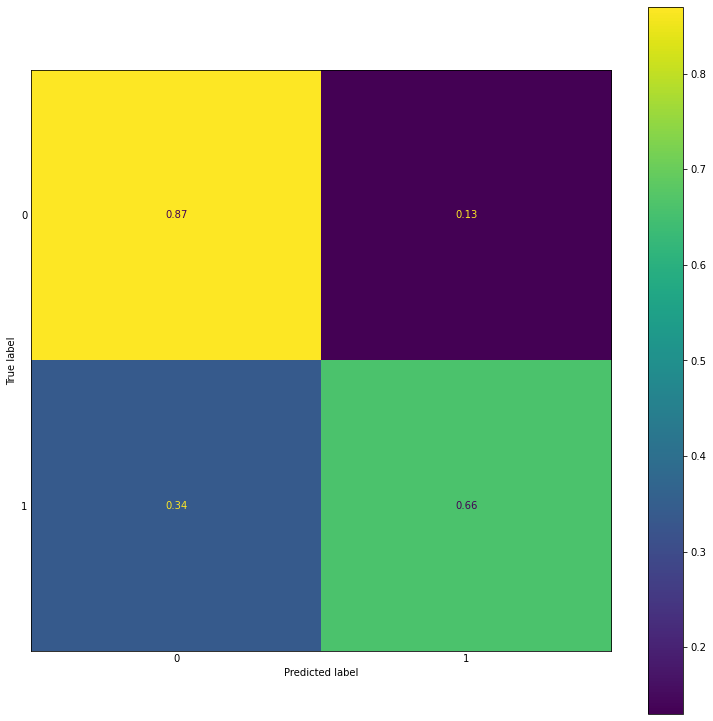

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both', length=0)
plt.xticks(ticks=range(0, 2), labels=model.classes_)
plt.yticks(ticks=range(0, 2), labels=model.classes_)
plt.grid(False)

plt.savefig('confusion_matrix.png')
plt.show()

The model does a pretty good job of correctly predicting users who are not retained. This suggests that a user who fits this pattern could perhaps be targeted for external engagement, such as a promotional email.